<a href="https://colab.research.google.com/github/Susmithareddya/K-Means-Clustering/blob/main/Color_Quantization_using_K_Means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Unsupervised Learning

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import skimage
import matplotlib.pyplot as plt





###  Color Quantization using K-Means clustering.

 The goal of this task is to perform color quantization using the K-Means clustering algorithm.

   i\. Implement the K-Means clustering algorithm using Numpy/SciPy.




In [ ]:
def K_means_clustering(train_X, k, max_iters=100):

    # Randomly initialize cluster centers
    np.random.seed(42)
    cluster_centers = train_X[np.random.choice(train_X.shape[0], k, replace=False)]

    for _ in range(max_iters):
        # Calculate distances between data points and cluster centers
        distances = np.linalg.norm(train_X[:, np.newaxis] - cluster_centers, axis=2)

        # Assign each data point to the nearest cluster center
        labels = np.argmin(distances, axis=1)

        # Update cluster centers
        new_centers = np.array([train_X[labels == i].mean(axis=0) if np.sum(labels == i) > 0 else cluster_centers[i] for i in range(k)])

        # Check for convergence
        if np.allclose(cluster_centers, new_centers):
            break

        cluster_centers = new_centers

    return cluster_centers


   ii\. Read the given image. Consider each pixel as a 3-dimensional vector and run your K-Means clustering algorithm to get 64 clusters.


In [ ]:
from skimage import io
import numpy as np

# Read image
image = io.imread('/content/sup_7_3_input.jpg')
# Convert image to array of shape (p, 3)
train_X = np.reshape(image, (-1, 3))

# Number of clusters
k = 64

# Run K-means clustering algorithm
cluster_centers = K_means_clustering(train_X, k)



  iii\. Assign each pixel the color value of its nearest cluster center. Visualize the result.

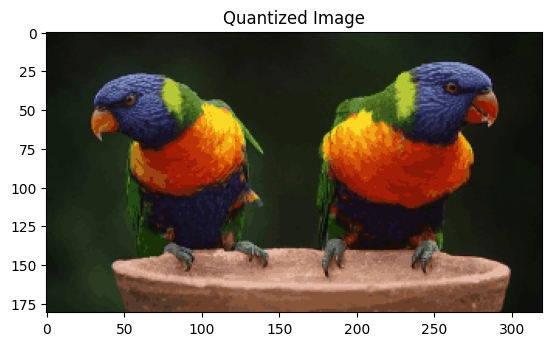

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to assign each pixel the color value of its nearest cluster center
def assign_colors_to_pixels(train_X, cluster_centers):
    distances = np.linalg.norm(train_X[:, np.newaxis] - cluster_centers, axis=2)
    labels = np.argmin(distances, axis=1)
    quantized_pixels = cluster_centers[labels]
    return quantized_pixels.reshape(image.shape)

# Assign colors to pixels using the nearest cluster centers
quantized_image = assign_colors_to_pixels(train_X, cluster_centers)

plt.imshow(quantized_image.astype(np.uint8))
plt.title('Quantized Image')
plt.show()

